# Lesson 11 - Clustering 

# Unsupervised vs. Supervised Learning:

* ### Supervised learning has both X and y in the training stage (.fit() ) stage.
* ### Unsupervised learning is feature discovery / pattern discovery. There is no label given to guide our training. We have to use some other metric given by the clusters themselves to guide our confidence in the result.

### See this image of clustering of comedies ranked by users:

<img src="http://blog.ranker.com/__wp/wp-content/uploads/2015/06/all3sm-1024x869.png">

## Evaluating a Clustering Result without a Label:

* For most datasets, the samples are not labeled
* Think about how we evaluate the quality of the clustering, using just our data and the clusters: tight clustering.
    * How spread out the samples in each cluster are is measured by inertia.
    * Lower values of inertia is better.
    * Not too many clusters is also a good idea
    * k-Means model minimizes the inertia, and the inertia value can be retrieved from the sklearn model by a call to `.inertia_`

## Many Models for Clustering
* Look at the resulting clustering / partitioning and decide which kind of patterns your data are likely to have before determining which type of alorithm is more appropriate.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

## K-Means: Centroid-Based Clustering is the Most Widely Used, So We Will Focus on It, While Introducing a Few Other Common Clustering Algorithms:
* Find k clusters in the data centrally located around various mean points
* Then, k-Means seeks to minimize the sum of squares about the means of the centroids
* The “standard” heuristic is called “Lloyd’s Algorithm”:
        1. Start with k initial mean values
        2. Data points are then split up into a Voronoi diagram (https://en.wikipedia.org/wiki/Voronoi_diagram)
        3. Each point is assigned to the “closest” mean
        4. Calculate new means based on centroids of points in the cluster
        5. Repeat until clusters do not change






## DBSCAN: Density-Based Clustering Chooses the Number of Clusters For Us, but is Computationally Heavy
* Density-based spatial clustering of applications with noise (1996)
* Main idea: Group together closely-packed points by identifying
    - Core points
    - Reachable points
    - Outliers (not reachable)
* A cluster is a collection of connected core points with their reachable points

* Two parameters:
    - min_samples
    - eps
    
* Deeper Explanation:
    - Core points have at east the min_samples number within epsilon (eps) of the core point. 
    
* Doesn’t work well when clusters are of varying densities.
* It's hard to chose parameters that work for all clusters
* Can be hard to chose correct parameters 


<img src="metrics-sil.png">

Wiki: https://en.wikipedia.org/wiki/Silhouette_(clustering)

### Silhouette Score from Sklearn
* from sklearn import metrics
* from sklearn.cluster import KMeans
* kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
* labels = kmeans_model.labels_
* metrics.silhouette_score(X, labels, metric='euclidean')


# Agenda:

## We will see the main clustering algorithms in action on synthetic data, then on real data. Then you can practice on data you already know!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

## Load a Synthetic, Noisy Cluster Dataset
* Made by the creators of HDBSCAN (https://github.com/scikit-learn-contrib/hdbscan)
* It is already scaled, which is very important.

In [2]:
data = np.load('../assets/datasets/clusterable_data.npy')

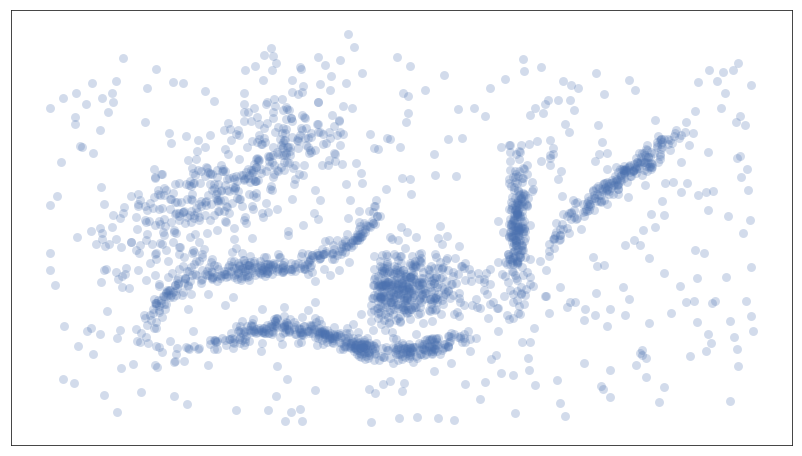

In [3]:
plt.figure(figsize=(14,8))
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

## 1. KMeans Clustering


- Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. 
- The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

### This might be a good algorithm to use if you are faced with one of the following situations:
* Behavioral segmentation:
    - Segmenting people by activities on websites or platform
    - Segmenting customers by purchase history
    - Defining user personas based on interests or activities
    - Creating profiles based on activity monitoring
* Inventory categorization:
    - Grouping inventory by sales activity
    - Grouping inventory by manufacturing metrics
* Sorting sensor measurements:
    - Detecting activity types in motion sensors
    - Grouping images
    - Separating audio
    - Identifying subsets of patients or at-risk groups in health monitoring
* Detecting bots or anomalies:
    - Separating normal activities from bots
    - Grouping normal activities for outlier detection
    
### With K-Means, Feature Variance is Feature Importance, so Scaling is Important! 
* Try K-Means with and without scaling to see the resulting cluster labels on supervised sets, so that you can understand the algorithms results


### Import Kmeans
* Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
from sklearn.cluster import KMeans

### Fit a K-Means Clustering Model for 6 Clusters 

Text(0.5,1,u'Clusters found by KMeans')

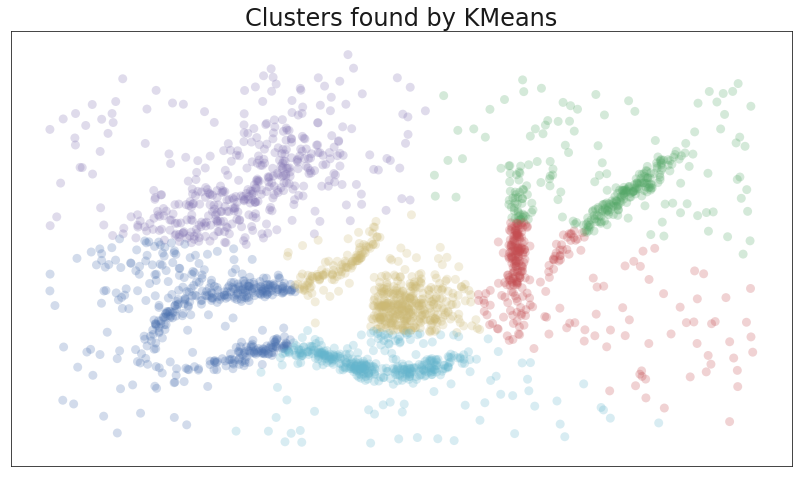

In [5]:
km_cluster_model = KMeans(n_clusters=6, random_state=0)
km_cluster_model.fit(data)
labels = km_cluster_model.predict(data)

# Plot the cluster labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(figsize=(14,8))
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(KMeans.__name__)), fontsize=24)

### How did K Means do?

* It's not a clustering algorithm, really. It's a **'partitioning' algorithm**. Do you see the partitions?
* We had to specify the number of partitions. Normally, we don't know how many segments our data has -- that's why we want to do clustering.
* The noise gets grouped in with nearby clusters. That might lead us to some incorrect conclusions.

### Let's do K Means again, with 10 Clusters:

Text(0.5,1,u'Clusters found by KMeans')

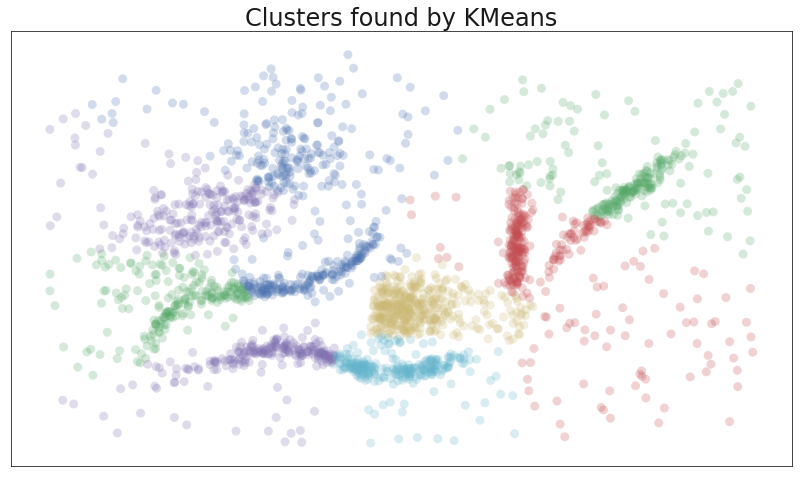

In [6]:
km_cluster_model = KMeans(n_clusters=10, random_state=0)
km_cluster_model.fit(data)
labels = km_cluster_model.predict(data)

# Plot the cluster labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(figsize=(14,8))
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(KMeans.__name__)), fontsize=24)

### What Interesting Results Do We See?
* Some of the real clusters are split because of the partitioning.
* Some chunks got better separation.
* The noise is still identified as part of nearby chunks.

## 2. Spectral Clustering
*  http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.cluster.SpectralClustering.html

### Import SpectralClustering

In [7]:
from sklearn.cluster import SpectralClustering

### Fit a Spectral Clustering Model with 6 Clusters:

Text(0.5,1,u'Clusters found by SpectralClustering')

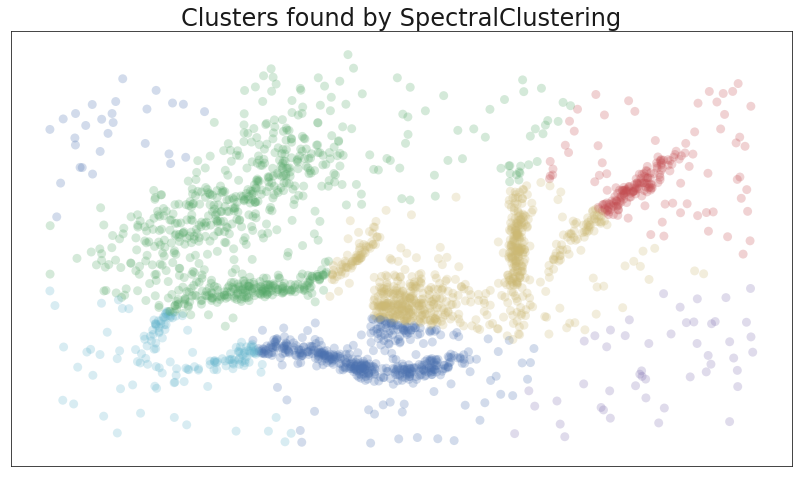

In [8]:
spectral_cluster_model = SpectralClustering(n_clusters=8)
labels = spectral_cluster_model.fit_predict(data)

# Plot the cluster labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]

plt.figure(figsize=(14,8))
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(SpectralClustering.__name__)), fontsize=24)

## 3. DBSCAN - Density Based Clustering

> Reminder from above:

* Density-based spatial clustering of applications with noise (1996)
* Main idea: Group together closely-packed points by identifying
    - Core points
    - Reachable points
    - Outliers (not reachable)
* A cluster is a collection of connected core points with their reachable points

* Two parameters:
    - min_samples
    - eps
    
* Deeper Explanation:
    - Core points have at east the min_samples number within epsilon (eps) of the core point. 
    
* Doesn’t work well when clusters are of varying densities.
* It's hard to chose parameters that work for all clusters
* Can be hard to chose correct parameters 

### Import DBSCAN from sklearn

In [10]:
from sklearn.cluster import DBSCAN

### Fit a DBSCAN Cluster Model with 'epsilon' of 0.025 & Plot

Text(0.5,1,u'Clusters found by DBSCAN')

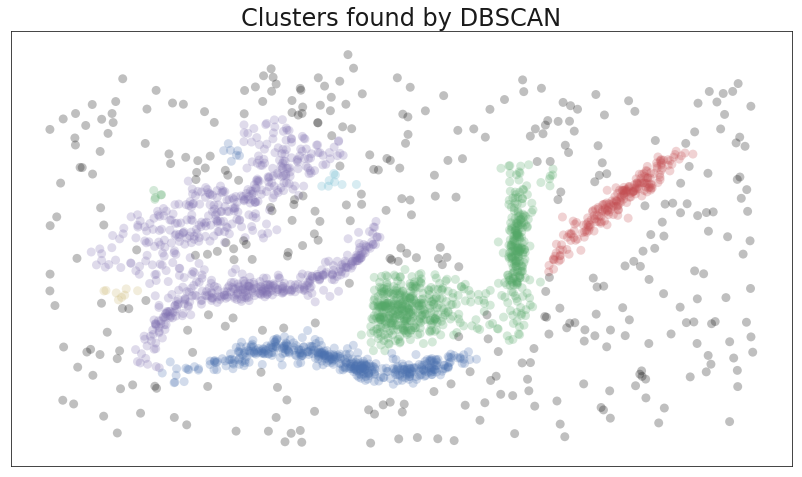

In [11]:
dbscan_cluster_model = DBSCAN(eps=0.025)
labels = dbscan_cluster_model.fit_predict(data)

# Plot the cluster labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(figsize=(14,8))
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(DBSCAN.__name__)), fontsize=24)

## Exercises with Real Data:
* Breast Cancer
* Old Faithful
* Iris
* Anything else?

### 1. Load the Breast Cancer Dataset from Sklearn's Datasets Module

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
bc_data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
bc_data['diagnosis'] = cancer.target
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2. Check the Baseline 

In [13]:
bc_data.diagnosis.mean()

0.6274165202108963

### 3. Check for Nulls

In [14]:
bc_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [15]:
bc_data.shape

(569, 31)

In [16]:
# Scaling the bc_dataset
from sklearn.preprocessing import scale
bc_data_scaled = pd.DataFrame(scale(bc_data.iloc[:,:32]))
bc_data_scaled.columns = list(bc_data.columns[:32])
bc_data_scaled['diagnosis'] = bc_data['diagnosis']

### 4. Plot the Correlation Map in Seaborn Using `.heatmap()`

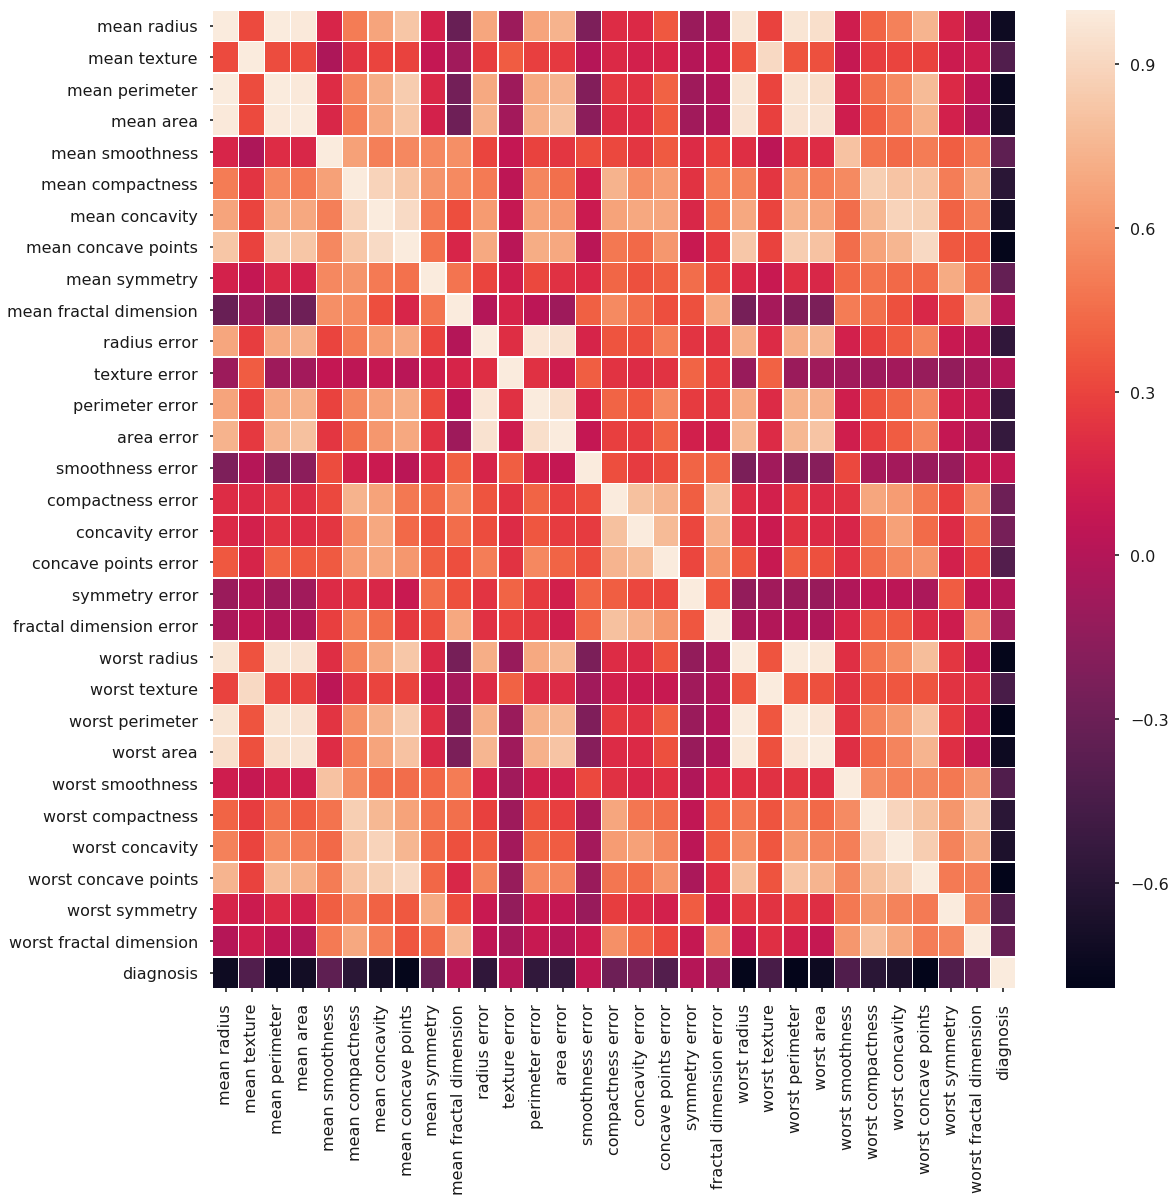

In [17]:
# Seaborn Correlation map using .heatmap()
plt.subplots(figsize=(18, 18))
sns.heatmap(bc_data_scaled.corr(), linewidths=.5, fmt= '.1f')

### 5. Plot the First 15 Features Using a Seaborn Violin Plot:
* We can use the `hue='diagnosis'` to see differences in population means for each feature.
* If tumors that are cancerous are very different from tumors that are not cancerous, that features will be a better 'classifier' / separator.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

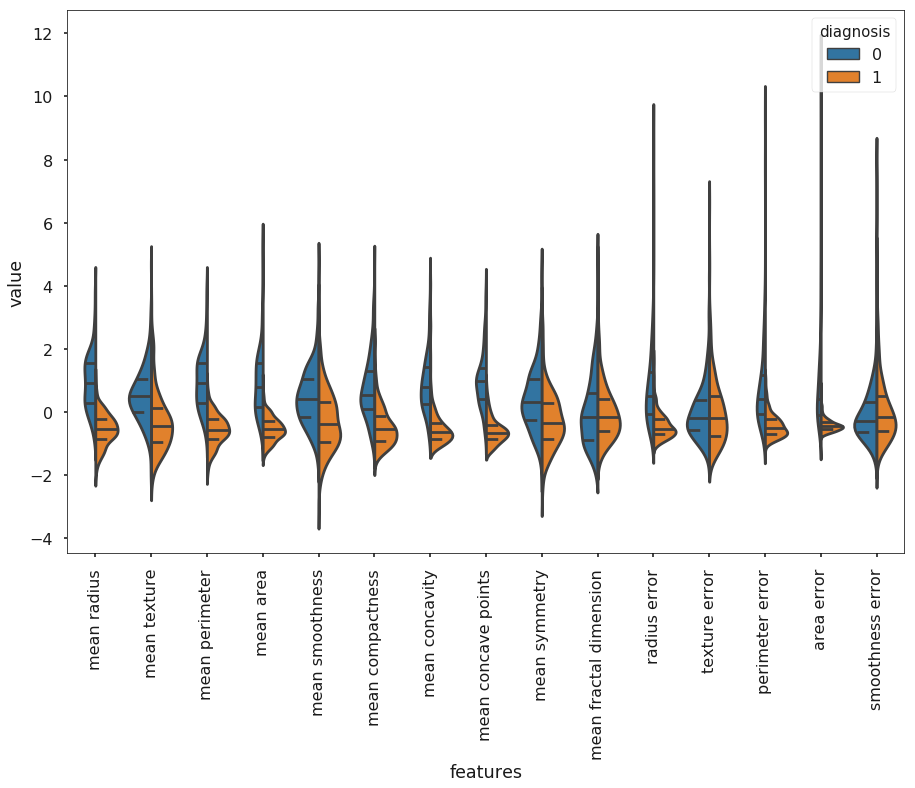

In [18]:
data_ = pd.concat([bc_data_scaled['diagnosis'],bc_data_scaled.iloc[:,0:15]],axis=1)
data_ = pd.melt(data_,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y='value', hue="diagnosis", data=data_,split=True, inner="quart")
plt.xticks(rotation=90)

### Question: Which features had the best separation of means/medians?

Answer:


## Comparing Clustering Models on Breast Cancer Data:
- K-Means Clustering
- Spectral Clustering
- DBSCAN Clustering

## First, a sidebar: TSNE for Plots:
* The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. 

### 5. Use TSNE to Plot the Multi-Dimensional Dataset in Clusters:
* We will use TSNE to visualize datasets with between (3, 50) features:
* http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* We fit TSNE to our X, just like estimators
* It allows us to plot multi-dimensional datasets so that we can see clusters

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)

In [ ]:
# Creating the X matrix with many features:
bc_data_drop = bc_data_scaled.drop('diagnosis',axis=1)
X = bc_data_drop.values

#Creating a 2D TSNE visualization to see the clusters
Y = tsne.fit_transform(X)

In [ ]:
#Cluster using k-means
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, 
              tol=0.0001, precompute_distances='auto', verbose=0, 
              random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

# Plot the K-Means predicted labels against the actual labels
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = bc_data_scaled['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [ ]:
#Cluster using Spectral clustering and visualize using TSNE


# Play with gamma to optimize the clustering results
spct = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', 
                          eigen_tol=0.0, assign_labels='kmeans', degree=3, 
                          coef0=1, kernel_params=None, n_jobs=1)
spctY = spct.fit_predict(X)

# Plot the predicted spectral labels against the actual diagnosis labels
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=spctY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = bc_data_scaled['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [ ]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
aggY = aggC.fit_predict(X)

# Plot the agglomerative cluster labels against the actual diagnosis labels
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(Y[:,0],Y[:,1],  c=aggY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = bc_data_scaled['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

# Practice: Old - Faithful Dataset - Unstructured
* Very simple: Only two features!
    - Eruption Time
    - Wait Time

In [ ]:
# Import the 'old-faithful.csv' dataset from your assets/datasets directory
of_df = pd.read_csv("../assets/datasets/old-faithful.csv")
of_df.head()

## Plot the 2D Data to See the Clusters

In [ ]:
of_df.plot.scatter(x="eruption_time", y="wait_time")
plt.show()

### Fit a K-Means Cluster Model

In [ ]:
kms = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
kms.fit(X)
# Clusters are given in the labels_ attribute
labels = kms.labels_

# Plot the data without comparison because it is unstructured (no-class / label) data
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=labels)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

# Practice - Iris Dataset - Structured
* Four features: 
    - Petal Length, Petal Width
    - Sepal Length, Sepal Width
* 3 Classes: 
    - Setosa, Versicolor, Virginica

In [ ]:
iris = pd.read_csv("../assets/datasets/iris.data")

sns.pairplot(iris, hue="species")
plt.show()

iris.tail()

### Fit a DBSCAN Algorithm / Estimator to Iris

In [ ]:
# The species column needs to be transformed. Use '.map()' with a dict 
# to turn string values into 0,1 and 2 labels: assign it to a series named 'iris_y'
iris_y = iris['species'].map({'Iris-setosa':0, 'Iris-virginica': 1, 'Iris-versicolor':2})

In [ ]:
# Fit a DBSCAN estimator with 'eps=0.85' and 'min_samples=10'
# Let X be all four columns of iris data
# Try to scale the data and wrap the result in a dataframe, naming the columns to the original names
db = DBSCAN(eps=0.85, min_samples=10)
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X_s = pd.DataFrame(scale(X), columns=X.columns)

#Creating a 2D TSNE visualization to see the clusters
Y = tsne.fit_transform(X_s)

# Create prediction labels / clusters: dbY
dbY = db.fit_predict(X_s)

# Plot the K-Means predicted labels against the actual labels
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=dbY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = iris_y, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

## Metrics:
* Silhouette Score